# In-painting images with random pixels removed

In [28]:
%matplotlib inline
import inpaint
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
from images2gif import writeGif
from scipy.misc import imread, imsave
from scipy.sparse import rand as sparse_rand
sns.set_context('notebook')

## Tarsier!

#### Load original image

In [2]:
orig = imread('/Users/ClaraFannjiang/code/inpaint/demos/tarsier.png');
m, n = orig.shape

#### Randomly remove half of the pixels

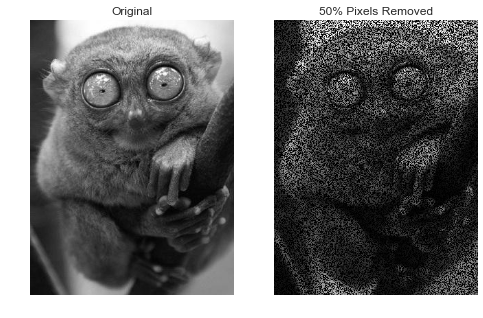

In [3]:
remove = sparse_rand(m, n, 0.5)
remove = remove.toarray() > 0

missing = orig.copy()
missing[remove] = 0

plt.figure(figsize=(8, 8));
plt.subplot(121); plt.imshow(orig, cmap='gray'); plt.title('Original'); plt.axis('off');
plt.subplot(122); plt.imshow(missing, cmap='gray'); plt.title('50% Pixels Removed'); plt.axis('off');

#### Run in-painting algorithm

In [4]:
known_coords = np.where(orig == missing)
ip = inpaint.Inpaint(verbose=True, store=True)
painted, objective, iterates = ip.transform(missing, known_coords)

Iter: 0. Objective: 77.380055. Best objective: 77.380055.
Iter: 100. Objective: 9.092996. Best objective: 8.487010.
Iter: 200. Objective: 8.224817. Best objective: 8.120083.
Iter: 200. Final objective 8.224817. Best objective 8.120083.


#### Compare original and in-painted images

Norm of error: 0.0565615529467


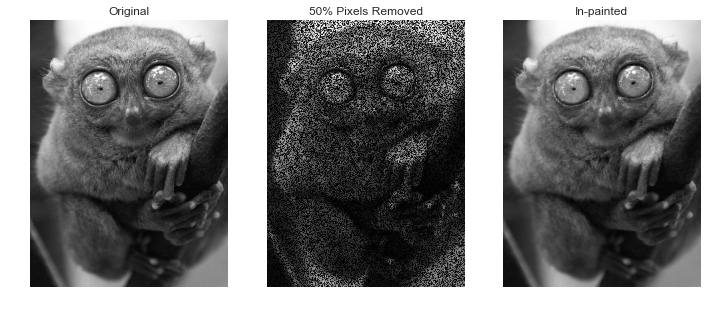

In [9]:
orig = orig.astype(float) # cast back to floats for error norm calculation
painted = painted.astype(float)
print "Norm of error: {}".format(la.norm(orig.flatten() - painted.flatten()) / la.norm(orig.flatten()))

plt.figure(figsize=(12, 8));
plt.subplot(131); plt.imshow(orig, cmap='gray'); plt.title('Original'); plt.axis('off');
plt.subplot(132); plt.imshow(missing, cmap='gray'); plt.title('50% Pixels Removed'); plt.axis('off');
plt.subplot(133); plt.imshow(painted, cmap='gray'); plt.title('In-painted'); plt.axis('off');

#### Norm of error as more pixels are removed

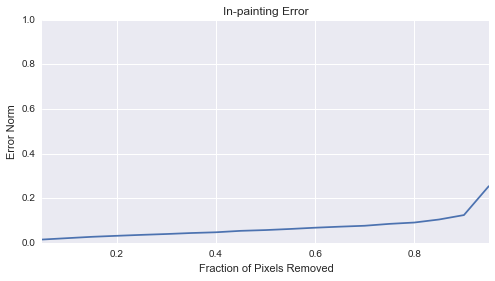

In [21]:
reload(inpaint)
fracs = np.arange(0.05, 1, 0.05)
n_frac = fracs.size
errors = np.empty(n_frac)
painted = n_frac * [None]

for i, frac in enumerate(fracs):
    
    remove = sparse_rand(m, n, frac)
    remove = remove.toarray() > 0

    missing = orig.copy()
    missing[remove] = 0
    
    known_coords = np.where(orig == missing)
    ip = inpaint.Inpaint()
    painted[i], _, _= ip.transform(missing, known_coords)
    painted[i] = painted[i].astype(float)
    
    errors[i] = la.norm(orig - painted[i]) / la.norm(orig)

sns.set_style('darkgrid')
plt.figure(figsize=(8, 4));
plt.plot(fracs, errors);
plt.xlim(fracs[0], fracs[-1]);
plt.ylim(0, 1);
plt.title('In-painting Error'); plt.xlabel('Fraction of Pixels Removed'); plt.ylabel('Error Norm');

#### We can remove a ton of pixels before the in-painting error is very perceptible.

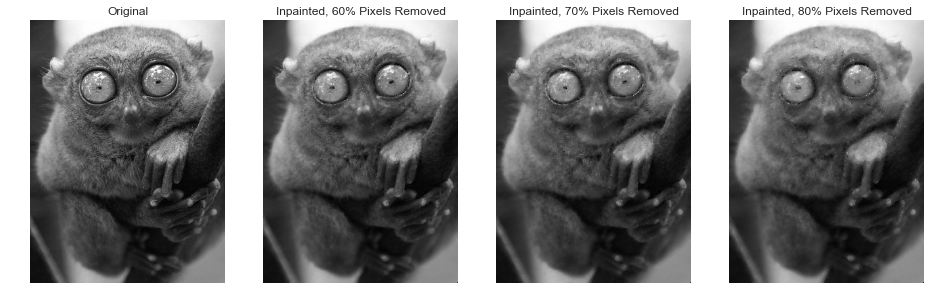

In [23]:
plt.figure(figsize=(16, 8));
plt.subplot(141); plt.imshow(orig, cmap='gray'); plt.title('Original'); plt.axis('off');
plt.subplot(142); plt.imshow(painted[11], cmap='gray'); plt.title('Inpainted, 60% Pixels Removed'); plt.axis('off');
plt.subplot(143); plt.imshow(painted[13], cmap='gray'); plt.title('Inpainted, 70% Pixels Removed'); plt.axis('off');
plt.subplot(144); plt.imshow(painted[15], cmap='gray'); plt.title('Inpainted, 80% Pixels Removed'); plt.axis('off');

## Ratatouille!

#### Load original image

In [2]:
orig = imread('/Users/ClaraFannjiang/code/inpaint/demos/remy.jpg');
m, n = orig.shape

#### Randomly remove 80% of the pixels

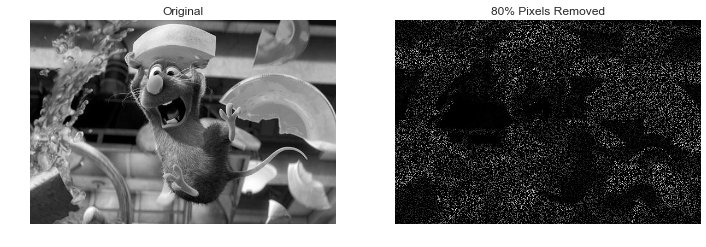

In [3]:
remove = sparse_rand(m, n, 0.8)
remove = remove.toarray() > 0

missing = orig.copy()
missing[remove] = 0

plt.figure(figsize=(12, 6));
plt.subplot(121); plt.imshow(orig, cmap='gray'); plt.title('Original'); plt.axis('off');
plt.subplot(122); plt.imshow(missing, cmap='gray'); plt.title('80% Pixels Removed'); plt.axis('off');

#### Run in-painting algorithm

In [8]:
known_coords = np.where(orig == missing)
ip = inpaint.Inpaint(verbose=True, store=True)
painted, objective, iterates = ip.transform(missing, known_coords)

Iter: 0. Objective: 58.720829. Best objective: 58.720829.
Iter: 100. Objective: 8.768995. Best objective: 7.513250.
Iter: 200. Objective: 7.078109. Best objective: 6.832706.
Iter: 200. Final objective 7.078109. Best objective 6.832706.


#### Save iterates as GIF. Watch it in your browser :)

In [14]:
iterates_upsamp = [iterates[i] for i in range(0, len(iterates), 20)]
writeGif('/Users/ClaraFannjiang/code/inpaint/demos/remy_inpainting.gif', iterates_upsamp, 
        duration=0.3, dither=False, dispose=1, subRectangles=False)

#### Compare original and in-painted images

Norm of error: 0.0846032543795


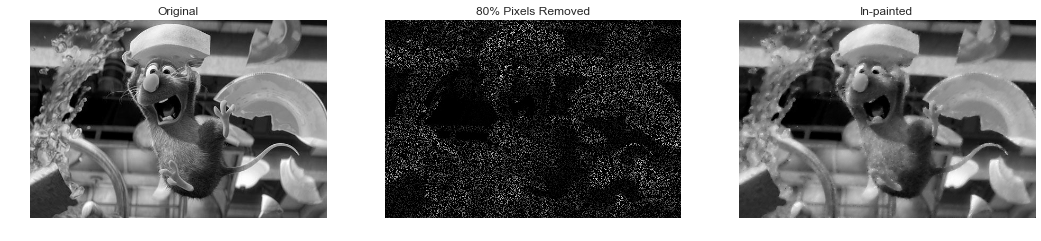

In [15]:
orig = orig.astype(float) # cast back to floats for error norm calculation
painted = painted.astype(float)
print "Norm of error: {}".format(la.norm(orig.flatten() - painted.flatten()) / la.norm(orig.flatten()))

plt.figure(figsize=(18, 6));
plt.subplot(131); plt.imshow(orig, cmap='gray'); plt.title('Original'); plt.axis('off');
plt.subplot(132); plt.imshow(missing, cmap='gray'); plt.title('80% Pixels Removed'); plt.axis('off');
plt.subplot(133); plt.imshow(painted, cmap='gray'); plt.title('In-painted'); plt.axis('off');

## How about recovering erased text?

#### Load original text and remove 95% of pixels

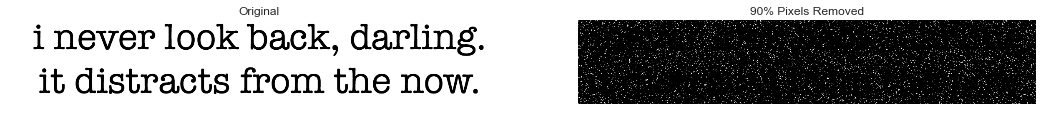

In [56]:
orig = imread('/Users/ClaraFannjiang/code/inpaint/demos/edna.png')
m, n = orig.shape

remove = sparse_rand(m, n, 0.95)
remove = remove.toarray() > 0

missing = orig.copy()
missing[remove] = 0

plt.figure(figsize=(18, 2));
plt.subplot(121); plt.imshow(orig, cmap='gray'); plt.title('Original'); plt.axis('off');
plt.subplot(122); plt.imshow(missing, cmap='gray'); plt.title('95% Pixels Removed'); plt.axis('off');

#### In-paint

In [73]:
known_coords = np.where(orig == missing)
ip = inpaint.Inpaint(verbose=True, store=True, alpha=600)
painted, objective, iterates = ip.transform(missing, known_coords)

Iter: 0. Objective: 33.939768. Best objective: 33.939768.
Iter: 100. Objective: 23.720717. Best objective: 22.481750.
Iter: 200. Objective: 17.814116. Best objective: 16.753642.
Iter: 300. Objective: 15.785254. Best objective: 14.816482.
Iter: 400. Objective: 13.799823. Best objective: 13.134446.
Iter: 500. Objective: 13.782799. Best objective: 13.134446.
Iter: 600. Objective: 13.769973. Best objective: 13.134446.
Iter: 600. Final objective 13.769973. Best objective 13.134446.


#### Compare true and restored text

Norm of error: 0.292053728794


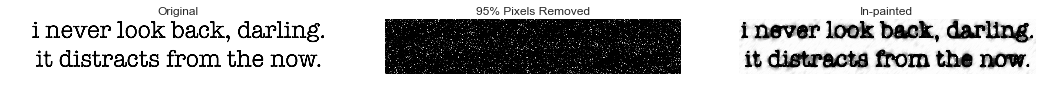

In [74]:
orig = orig.astype(float) # cast back to floats for error norm calculation
painted = painted.astype(float)
print "Norm of error: {}".format(la.norm(orig.flatten() - painted.flatten()) / la.norm(orig.flatten()))

plt.figure(figsize=(18, 2));
plt.subplot(131); plt.imshow(orig, cmap='gray'); plt.title('Original'); plt.axis('off');
plt.subplot(132); plt.imshow(missing, cmap='gray'); plt.title('95% Pixels Removed'); plt.axis('off');
plt.subplot(133); plt.imshow(painted, cmap='gray'); plt.title('In-painted'); plt.axis('off');